In [1]:
from etc.init import *
import etc.figureslib as lib

import NotebookScripter
from NotebookScripter import run_notebook, receive_parameter
NotebookScripter.set_notebook_option(with_matplotlib_backend=None)
savefig = receive_parameter(savefig=False)
saveext = receive_parameter(saveext='pdf')
try:
    data
except NameError:
    data = receive_parameter(data=None)

if data is None:
    data = run_notebook("Figures_load_data.ipynb")
records = data.records

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
[monochrome_palette]: value was greater than 1 and was clipped.



import copy
import os.path
import itertools
from collections import Iterable, OrderedDict, namedtuple, deque
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image
from matplotlib.gridspec import GridSpec
import pymc3 as pymc
import pandas as pd
from pandas import DataFrame
from parameters import ParameterSet

from importlib import reload

import theano_shim as shim

import mackelab as ml
import mackelab.smttk as smttk
import mackelab.iotools
import mackelab.pymc3
import mackelab.parameters
import mackelab.plot
ml.parameters.Transform.namespaces['shim'] = shim

import sinn
import sinn.histories as histories
import sinn.models
from sinn.optimize.gradient_descent import FitCollection
import sinn.analyze as anlz
from sinn.analyze.axisdata import LogLikelihood, Likelihood, Probability
from sinn.analyze.axis import Axis

import fsGIF.core as core
import fsGIF.fsgif_model as fsgif_model
from fsGIF.fsgif_model

---

In [2]:
mplconfig = run_notebook("Figures_matplotlib_config.ipynb")
inject_vars(mplconfig, globals())

## Fig 1a

In [3]:
fig1a = ml.utils.PDF("figures/fig1a.pdf", size=(300, 300))

In [4]:
# Create a pdf with the label to be added
if savefig:
    ml.plot.subreflabel_pdf("a")

## Fig 1b

In [5]:
outputname = "Fig1b"

(Fig1b uses a subset of the data for Fig5, so we load that data here.)

100%|██████████| 29/29 [00:01<00:00, 17.59it/s]


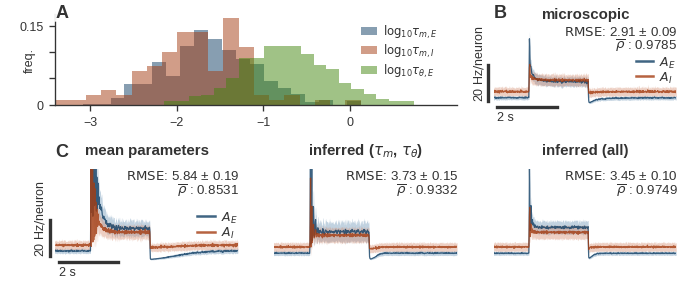

In [6]:
fig_hetero_nb = run_notebook("Figures_hetero-model.ipynb", data=data, savefig=False)

In [7]:
#pdfbox = ml.utils.mm2in((79,60))
pdfbox = ml.utils.mm2in((60.716,52.01488))

In [8]:
simtraces = fig_hetero_nb.simtraces

In [ ]:
counts = fig_hetero_nb.counts

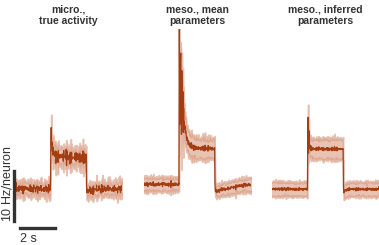

In [18]:
idx = (slice(None),1)
maxstops = 200
ylim = (0,39)

fig1b = plt.figure(figsize=(textwidth-pdfbox[0]-0.2,pdfbox[1]))
  # -0.1: margin between box and figures

models = ['true_micro', 'true_meso', 'map_full']
titles = lib.AxAttrs(
    true_micro = "micro.,\ntrue activity",
    true_meso  = "meso., mean\nparameters",
    map_full   = "meso., inferred\nparameters")
_axes = fig1b.subplots(1,len(models))
axes = lib.AxAttrs({k: ax for k,ax in zip(models, _axes.flatten())})

with plt.style.context({'axes.titlesize': 'x-small', 'axes.labelsize': 'x-small'}):
    for ax, trace, title in zip(axes[models], simtraces[models], titles[models]):
        lib.plot_series_stats(trace, ax=ax, idx=1, xlim=(10, 16),
                              linecolor=colours[1], shadecolor=colours_light[1])
        ax.set_title(title, pad=3)
        ax.set_ylim(ylim)

    ml.plot.draw_xscale(2, "2 s", xshift=4, ax=axes.true_micro)
    ml.plot.draw_yscale(10, "10 Hz$/$neuron", yshift=-4, ax=axes.true_micro)
    axes.true_meso.set_axis_off()
    axes.map_full.set_axis_off()

    fig1b.subplots_adjust(left=0.04, top=0.88, bottom=0.08, right=1)
    
    assert(outputname == "Fig1b")
    if savefig:
        plt.savefig("figures/" + os.path.splitext(outputname)[0] + '.' + saveext.strip('.'))

In [ ]:
# Create a pdf with the label to be added
if savefig:
    ml.plot.subreflabel_pdf("b")

In [ ]:
print("Padding around figure: {} in".format(mpl.rcParams.find_all('savefig.pad_inches')))

---
Old approach

    fig5 = fig_hetero_nb.fig5

```python
    idx = (slice(None),1)
    maxstops = 200
    ylim = (0,30)

    fig1b = plt.figure(figsize=(textwidth-pdfbox[0],pdfbox[1]))
    with plt.style.context({'axes.titlesize': 'x-small', 'axes.labelsize': 'x-small'}):
        axes = []
        hists = [fig5.true_a, fig5.avg_hist_a, fig5.result_hists_a['full fit']]
        titles = ["micro.,\ntrue activity", "meso., mean\nparameters", "meso., inferred\nparameters"]
        for k, (hist, title) in enumerate(zip(hists, titles)):
            ax = fig1b.add_subplot(1,3,k+1)
            axes.append(ax)
            _μ, _σ = lib.get_μσ(hist, window=0.1, μ=fig5.μ, σ=fig5.σ)
            _μ = _μ.align_to(_σ)

            # Decimate histories so they don't have too many points to plot
            step = max(int(len(_σ) / maxstops), 1)
            _σ = anlz.decimate(_σ, step)
            _μ = anlz.decimate(_μ, step)

            ax.set_title(title)#, pad=3)
            σcolour = ml.plot.colors.desaturate(
                ml.plot.colors.lighten(colours_light[1], 0.6, relative=True), 0.25)
            ax.fill_between(_μ.time,
                            _μ.trace[idx]-_σ.trace[idx],
                            _μ.trace[idx]+_σ.trace[idx],
                            color=σcolour, zorder=0, alpha=1,
                            linestyle='None')

            ax.plot(_μ.time, _μ.trace[idx], color=colours[1], zorder=1)
            ax.set_ylim(ylim)

        ml.plot.draw_xscale(2, "2 s", xshift=4, ax=axes[0])
        ml.plot.draw_yscale(10, "10 Hz$/$neuron", yshift=-4, ax=axes[0])
        for ax in axes[1:]:
            ax.set_axis_off()

        #ml.plot.subreflabel(axes[0], "b", x=-0.15, y=1.05, backgroundcolor=white)

        fig1b.subplots_adjust(top=0.86, bottom=0.08, right=0.99)

        assert(outputname == "Fig1b")
        if savefig:
            plt.savefig("figures/" + outputname.strip('.') + '.' + saveext.strip('.'))
```